<a href="https://colab.research.google.com/github/sripriyakonjarla/Machine_Learning/blob/main/lab_session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving training_mathbert.xlsx to training_mathbert.xlsx


In [2]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
data = pd.read_excel('training_mathbert.xlsx')
df= pd.DataFrame(data)



test_accuracies = []
X = df.loc[:, 'embed_0':'embed_383'].values
y = df['class(0/1)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
print("Performance on Testing Data:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("False Positives of testing data:", fp)
print("False Negatives of testing data:", fn)

if accuracy_score(y_train, y_train_pred) > 0.9 and accuracy_score(y_test, y_test_pred) < 0.8:
    print("\nModel is likely overfitting.")
elif accuracy_score(y_train, y_train_pred) < 0.7 :
    print("\nModel is likely underfitting.")
else:
    print("\nModel seems to be regular fitting.")


Performance on Testing Data:
Confusion Matrix:
 [[146  22]
 [ 33  25]]
Accuracy: 0.7566371681415929
Precision: 0.5319148936170213
Recall: 0.43103448275862066
F1-Score: 0.4761904761904762
False Positives of testing data: 22
False Negatives of testing data: 33

Model seems to be regular fitting.


In [3]:
uploaded2 = files.upload()

Saving IRCTC Stock Price.xlsx to IRCTC Stock Price.xlsx


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

data1 = pd.read_excel('IRCTC Stock Price.xlsx')
price = data1.copy()
price['Predicted_Price'] = price['Price'].shift(1)
price = price.dropna()

realprice = price['Price'].values
assumedprice = price['Predicted_Price'].values

mse = mean_squared_error(realprice, assumedprice)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(realprice, assumedprice)
r2 = r2_score(realprice, assumedprice)

print("mse is:",mse)
print("rmse is:",rmse)
print("mape is:",mape)
print("r2 score is:",r2)

mse is: 1371.1075604838709
rmse is: 37.028469594136226
mape is: 0.013644497650508165
r2 score is: 0.9762095325063174


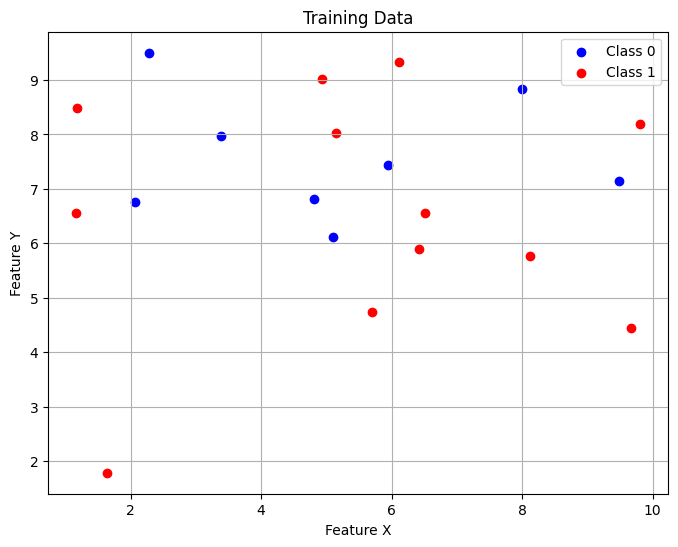

In [5]:
np.random.seed(0)

# Generate training data
Xtrain = np.random.uniform(1, 10, (20, 2))
ytrain = np.random.randint(0, 2, 20)

# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(Xtrain[ytrain == 0][:, 0], Xtrain[ytrain == 0][:, 1], color='blue', label='Class 0')
plt.scatter(Xtrain[ytrain == 1][:, 0], Xtrain[ytrain == 1][:, 1], color='red', label='Class 1')
plt.title('Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

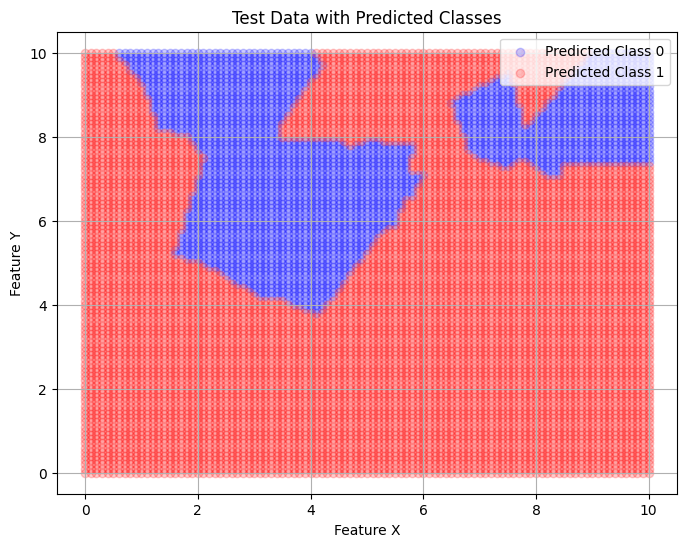

In [6]:
x1, x2 = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
Xtest = np.c_[x1.ravel(), x2.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)

plt.figure(figsize=(8, 6))
plt.scatter(Xtest[ypred == 0][:, 0], Xtest[ypred == 0][:, 1], color='blue', alpha=0.2, label='Predicted Class 0')
plt.scatter(Xtest[ypred == 1][:, 0], Xtest[ypred == 1][:, 1], color='red', alpha=0.2, label='Predicted Class 1')

plt.title('Test Data with Predicted Classes')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

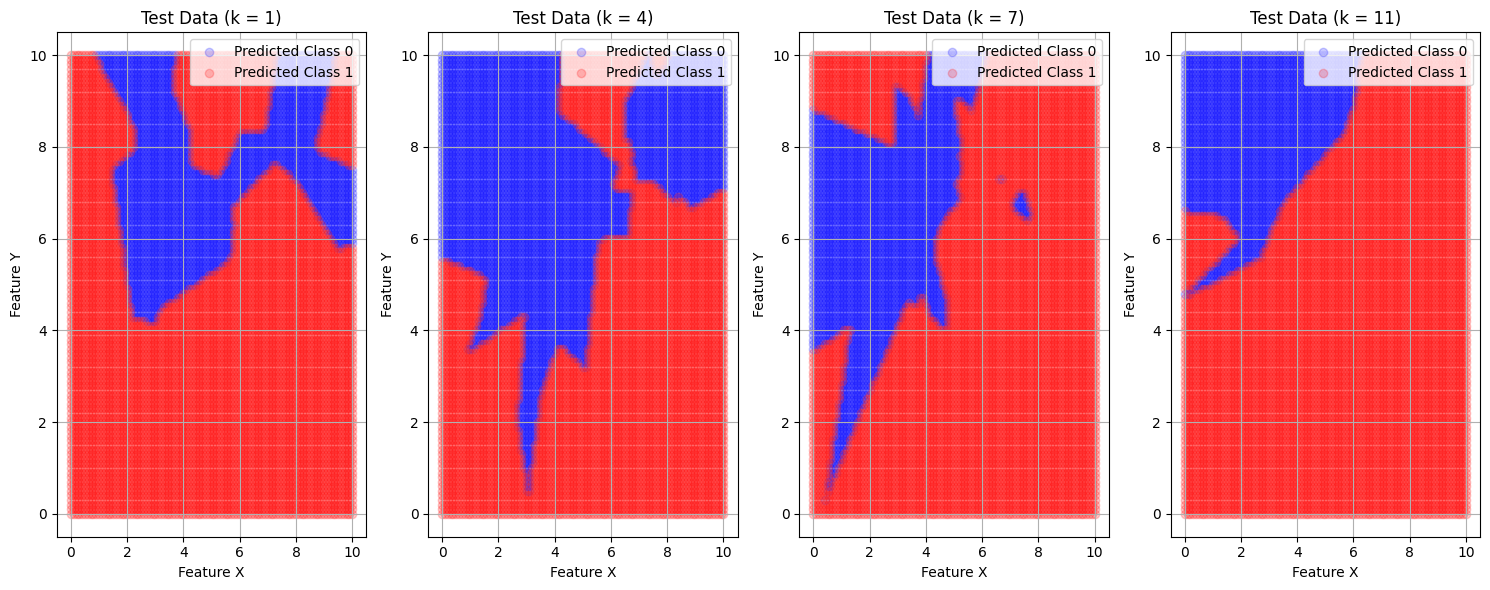

In [39]:
x1, x2 = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
Xtest = np.c_[x1.ravel(), x2.ravel()]

k_values = [1, 4, 7,11]

fig, axes = plt.subplots(1, len(k_values), figsize=(15, 6))

for i, k in enumerate(k_values):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(Xtrain, ytrain)

  ypred = knn.predict(Xtest)


  axes[i].scatter(Xtest[ypred == 0][:, 0], Xtest[ypred == 0][:, 1], color='blue', alpha=0.2, label='Predicted Class 0')
  axes[i].scatter(Xtest[ypred == 1][:, 0], Xtest[ypred == 1][:, 1], color='red', alpha=0.2, label='Predicted Class 1')
  axes[i].set_title(f'Test Data (k = {k})')
  axes[i].set_xlabel('Feature X')
  axes[i].set_ylabel('Feature Y')
  axes[i].legend()
  axes[i].grid(True)
plt.tight_layout()
plt.show()

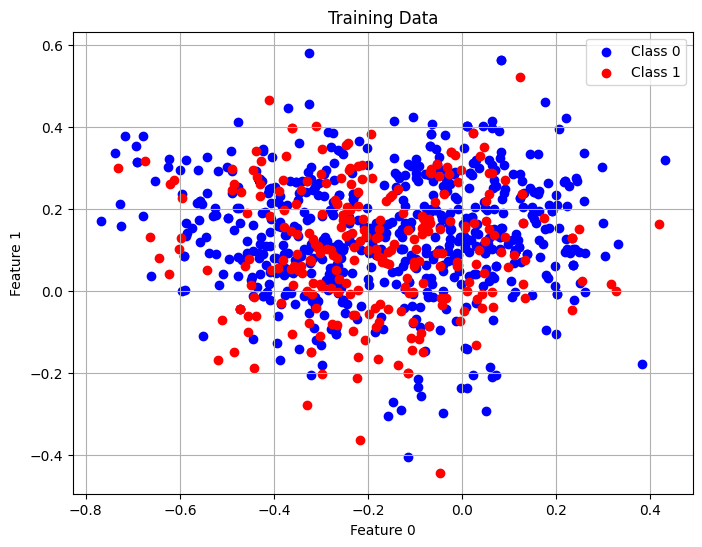

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_excel('training_mathbert.xlsx')
df = pd.DataFrame(data)

# Extract features and labels
X = df.loc[:, 'embed_0':'embed_1'].values
y = df['class(0/1)'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scatter plot for the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
plt.title('Training Data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()



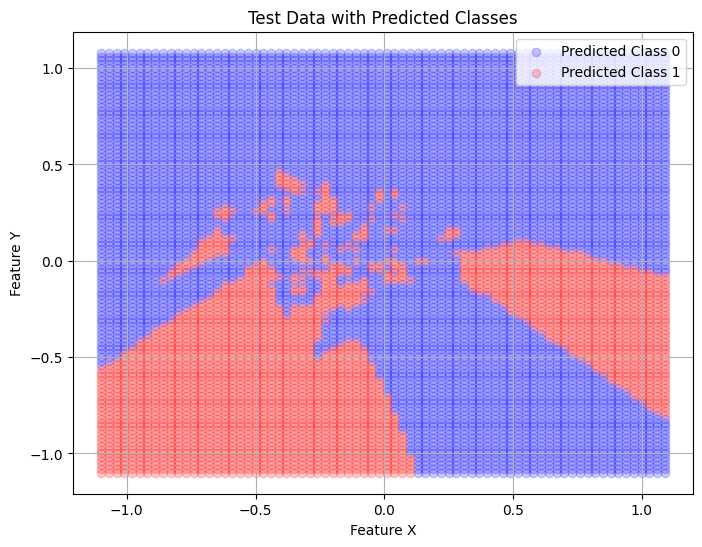

In [41]:

x1, x2 = np.meshgrid(np.arange(-1.1, 1.1, 0.03), np.arange(-1.1, 1.1, 0.02))
X_test = np.c_[x1.ravel(), x2.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='blue', alpha=0.2, label='Predicted Class 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='red', alpha=0.2, label='Predicted Class 1')

plt.title('Test Data with Predicted Classes')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()


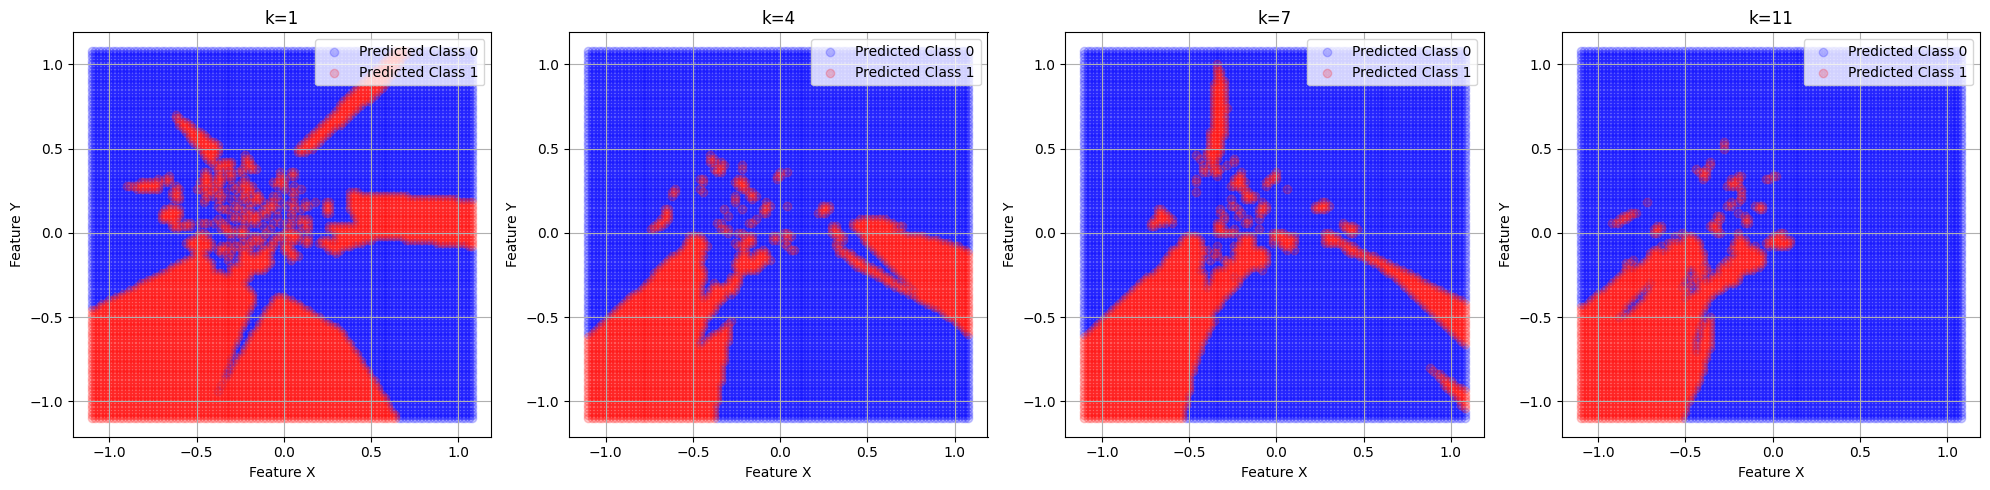

In [42]:
x1, x2 = np.meshgrid(np.arange(-1.1, 1.1, 0.02), np.arange(-1.1, 1.1, 0.02))
X_test_grid = np.c_[x1.ravel(), x2.ravel()]

k_values = [1, 4, 7, 11]

fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test_grid)

    axs[i].scatter(X_test_grid[y_pred == 0][:, 0], X_test_grid[y_pred == 0][:, 1], color='blue', alpha=0.2, label='Predicted Class 0')
    axs[i].scatter(X_test_grid[y_pred == 1][:, 0], X_test_grid[y_pred == 1][:, 1], color='red', alpha=0.2, label='Predicted Class 1')

    axs[i].set_title(f'k={k}')
    axs[i].set_xlabel('Feature X')
    axs[i].set_ylabel('Feature Y')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
param_dist = {'n_neighbors': randint(1, 21)}

random_search = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_k = random_search.best_params_['n_neighbors']
best_score = random_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best cross-validation score: {best_score:.4f}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best k: {test_accuracy:.4f}")

Best k value: 4
Best cross-validation score: 0.7111
Test set accuracy with best k: 0.7257
